In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("IndianElection19TwitterData.csv")

In [3]:
df

,Unnamed: 0,Date,User,Tweet
0,0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...
3,3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...
4,4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...
...,...,...,...,...
142561,62208,2019-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...
142562,62211,2019-03-06 10:11:43+00:00,RAMANKAIRA,@DrKumarVishwas Early morning #political move ...
142563,63684,2019-01-24 12:57:48+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...
142564,63685,2019-01-24 12:48:37+00:00,thota_J,CVoter predicts seat share for upcoming #LokSa...


In [4]:
def find_people(tweet):
    people = re.findall("@[a-zA-Z0-9]{1,50}", tweet)
    if people == None:
        return ""
    return " ".join(people)
def clean_tweet(tweet):
    return re.sub("@[a-zA-Z0-9_]+","",tweet)
def find_hashtags(tweet):
    tags = re.findall("#([a-zA-Z0-9_]{1,50})", tweet)
    if tags == None:
        return ""
    return " ".join(tags)

In [5]:
df['clean_tweet'] =  df['Tweet'].apply(clean_tweet)

In [6]:
df['tagged_people'] = df['Tweet'].apply(find_people)

In [7]:
df.head()

,Unnamed: 0,Date,User,Tweet,clean_tweet,tagged_people
0,0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,I am seeing you as future #bjp spokesperson.....,@anjanaomkashyap
1,1,2019-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,Trinamool Congress Sitting MP Abhishek Banerje...,
2,2,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,#LokSabhaElections2019 \n23rd May 2019 will re...,
3,3,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,#LokSabhaElections2019 \n23rd May 2019 will re...,@ECISVEEP
4,4,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,PM Modi creates a new record of being the only...,


In [8]:
G = nx.Graph()

In [9]:
i = 0
for s, t in df[['User', 'tagged_people']].values:
    if(t is None):
        G.add_node(i,name=s)
        i += 1
    else:
        G.add_node(i, name=s)
        G.add_node(i+1, name=t)
        G.add_edge(i, i+1)
        i += 2

In [10]:
G = nx.from_pandas_edgelist(df,
                        source='User',
                        target='tagged_people')

In [11]:
nx.write_edgelist(G, "user-user.csv")

In [12]:
import statistics as stat
list_degree = list(G.degree())
temp = [j for i, j in list_degree]
print(f"mean: {stat.mean(temp)}, median: {stat.median(temp)}")

mean: 2.2506583241430533, median: 1.0


In [13]:
# return a new graph object that contains the network with pendant and isolated nodes removed
def trim_degrees(g, degree=1):
 g2=g.copy()
 d=nx.degree(g2)
#  for n in g2.nodes():
 for n in list(g2):
   if d[n]<=degree: g2.remove_node(n)
 return g2


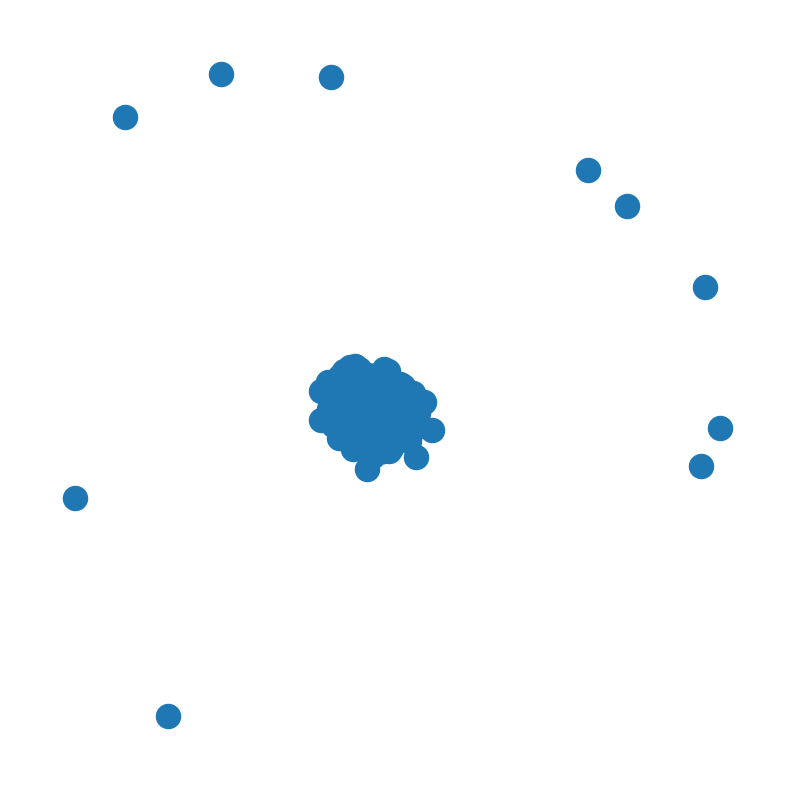

In [14]:
core1=trim_degrees(G, 25)
len(core1)
plt.figure(3, figsize=(10,10))
plt.margins(x=0.1, y=0.1)
nx.draw(core1 )
# nx.draw(G)
plt.show()

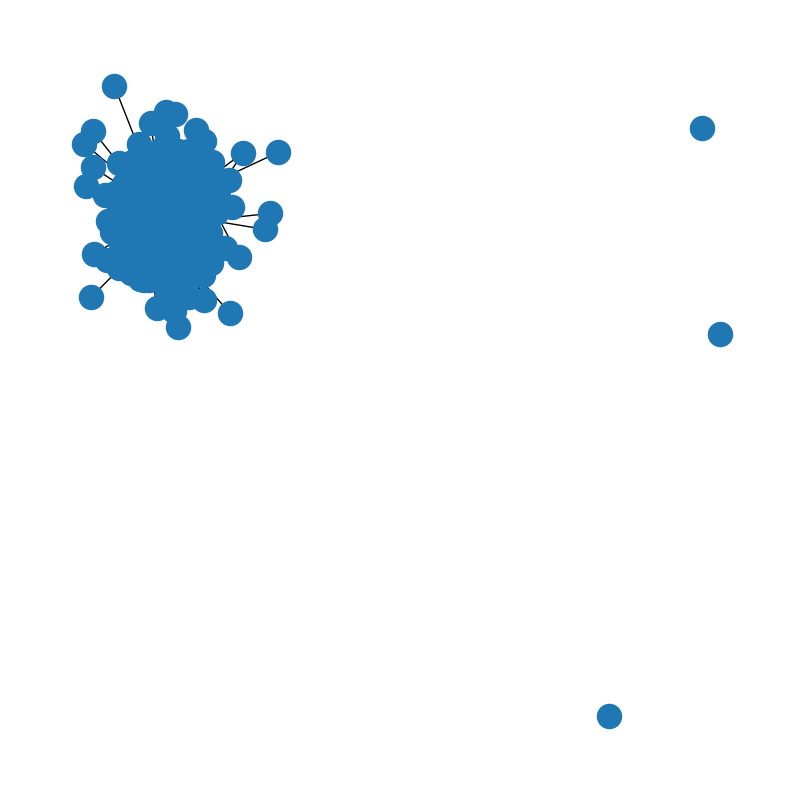

In [15]:
core1=trim_degrees(G, 40)
len(core1)
plt.figure(3, figsize=(10,10))
plt.margins(x=0.1, y=0.1)
nx.draw(core1 )
# nx.draw(G)
plt.show()

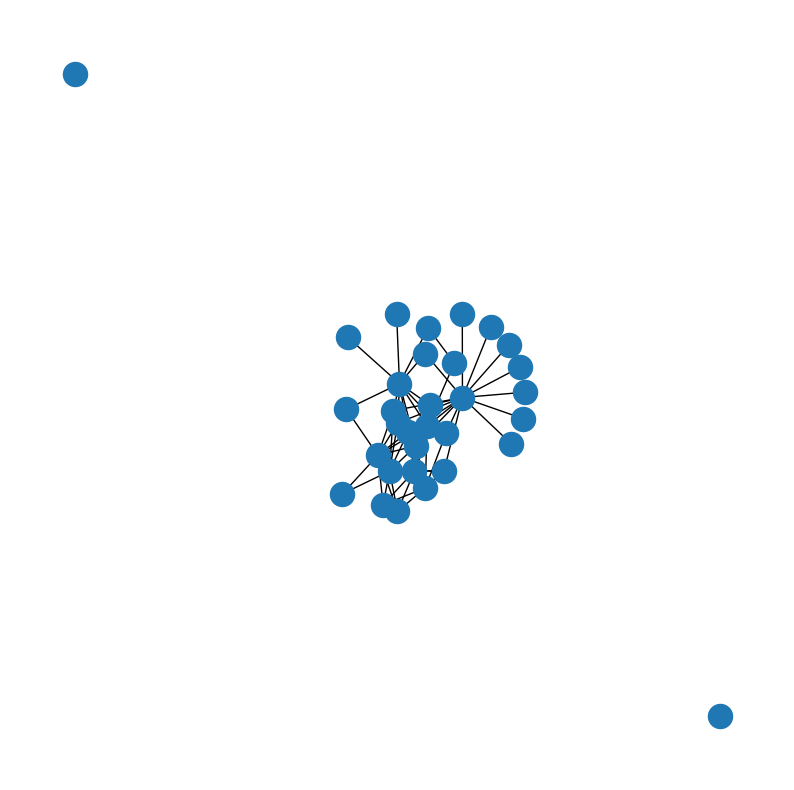

In [16]:
core1=trim_degrees(G, 170)
len(core1)
plt.figure(3, figsize=(10,10))
plt.margins(x=0.1, y=0.1)
nx.draw(core1 )
# nx.draw(G)
plt.show()

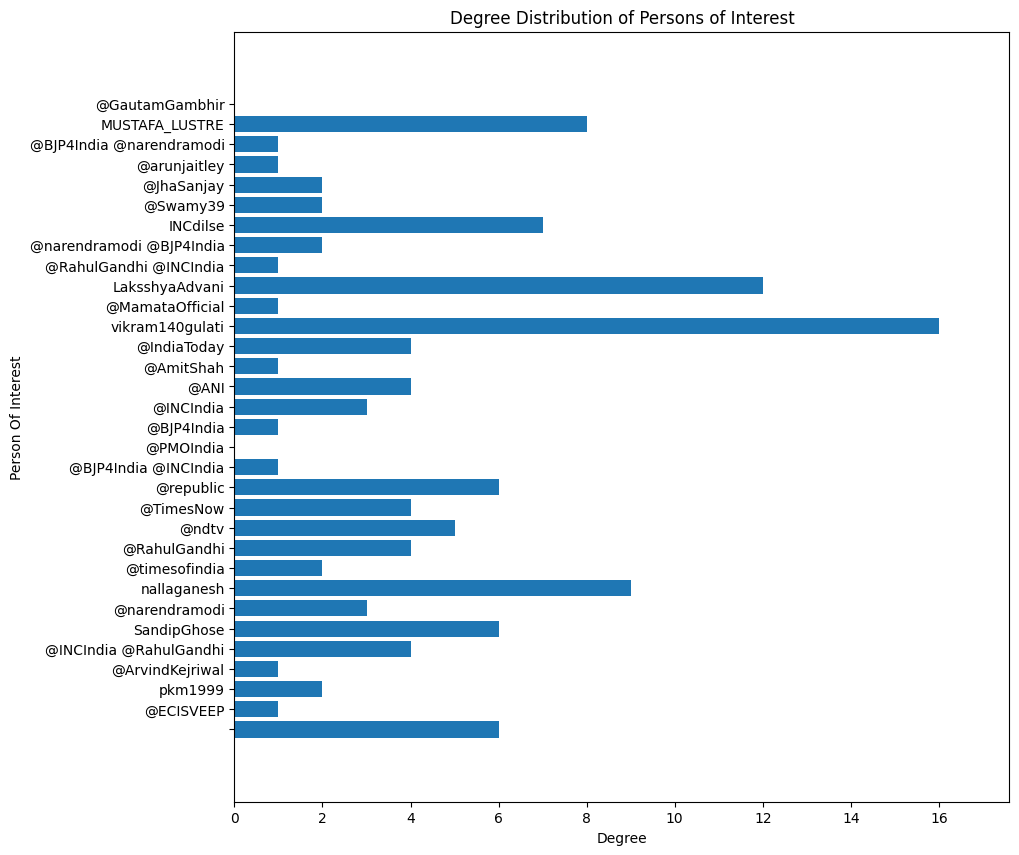

In [17]:

plt.figure(1, figsize=(10,10))
plt.title("Degree Distribution of Persons of Interest")
plt.margins(x=0.1, y=0.1)
degrees = list(nx.degree(core1))
nodes = [i for i,j in degrees]
degree = [j for i, j in degrees]
plt.xlabel("Degree")
plt.ylabel("Person Of Interest")
plt.barh(nodes, degree)
plt.show()

In [18]:
core1.nodes

NodeView(('', '@ECISVEEP', 'pkm1999', '@ArvindKejriwal', '@INCIndia @RahulGandhi', 'SandipGhose', '@narendramodi', 'nallaganesh', '@timesofindia', '@RahulGandhi', '@ndtv', '@TimesNow', '@republic', '@BJP4India @INCIndia', '@PMOIndia', '@BJP4India', '@INCIndia', '@ANI', '@AmitShah', '@IndiaToday', 'vikram140gulati', '@MamataOfficial', 'LaksshyaAdvani', '@RahulGandhi @INCIndia', '@narendramodi @BJP4India', 'INCdilse', '@Swamy39', '@JhaSanjay', '@arunjaitley', '@BJP4India @narendramodi', 'MUSTAFA_LUSTRE', '@GautamGambhir'))

In [19]:
degree = nx.degree_centrality(core1)

In [20]:
x =sorted(degree, key = lambda x: degree[x], reverse = True)
x[:10]

['vikram140gulati',
 'LaksshyaAdvani',
 'nallaganesh',
 'MUSTAFA_LUSTRE',
 'INCdilse',
 '',
 'SandipGhose',
 '@republic',
 '@ndtv',
 '@INCIndia @RahulGandhi']

100%|██████████| 190/190 [02:16<00:00,  1.39it/s]


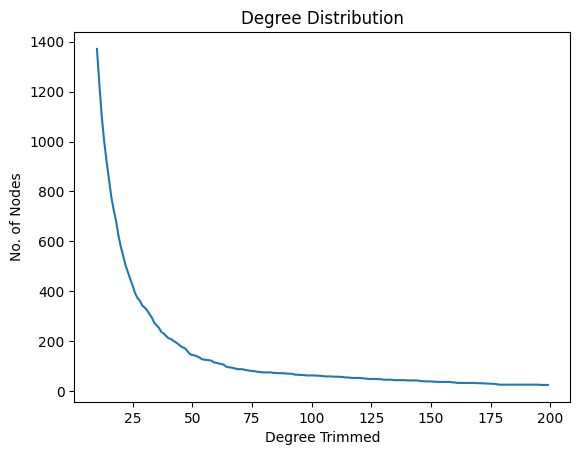

In [21]:
import tqdm
y = []
with tqdm.tqdm(total = 190) as t:
    for i, d in enumerate(range(10, 200)):
        core1=trim_degrees(G, d)
        y.append(len(core1))
        t.update(1)

plt.xlabel("Degree Trimmed")
plt.ylabel("No. of Nodes")
plt.title("Degree Distribution")
plt.plot([i for i in range(10, 200)], y)
plt.show()
    

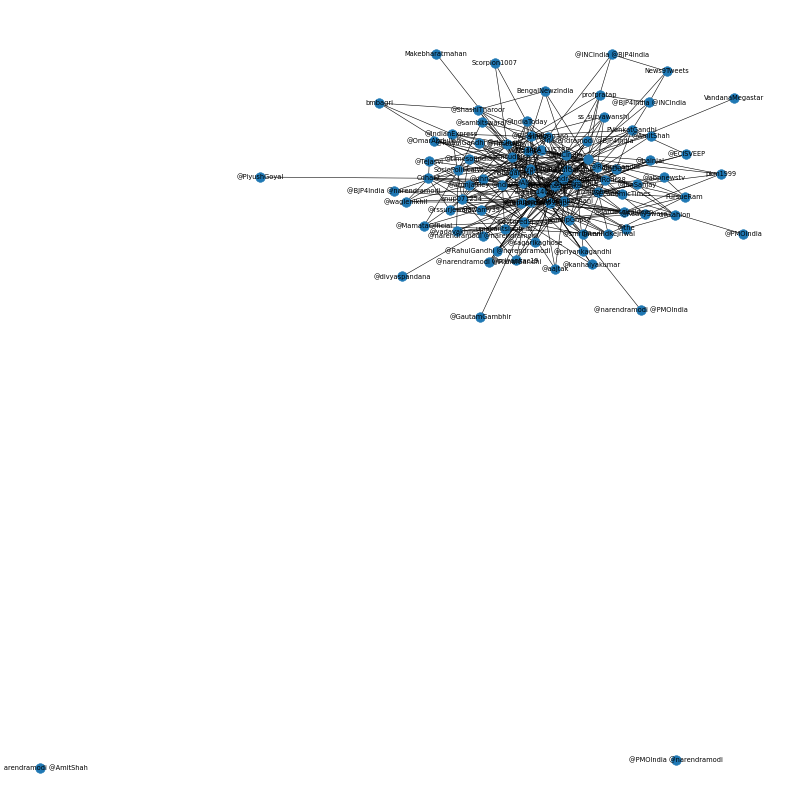

In [22]:
deg_gt150 = trim_degrees(G, 70)
fig = plt.figure(1, figsize=(20,20), dpi=40)
nx.draw(deg_gt150,with_labels=True)

In [23]:

eg_centrality = nx.eigenvector_centrality(deg_gt150, max_iter=100, tol=1.0e-3)

In [24]:
nx.set_node_attributes(deg_gt150, eg_centrality, 'eg_centrality')
nx.set_node_attributes(deg_gt150, list(deg_gt150.nodes), 'person')

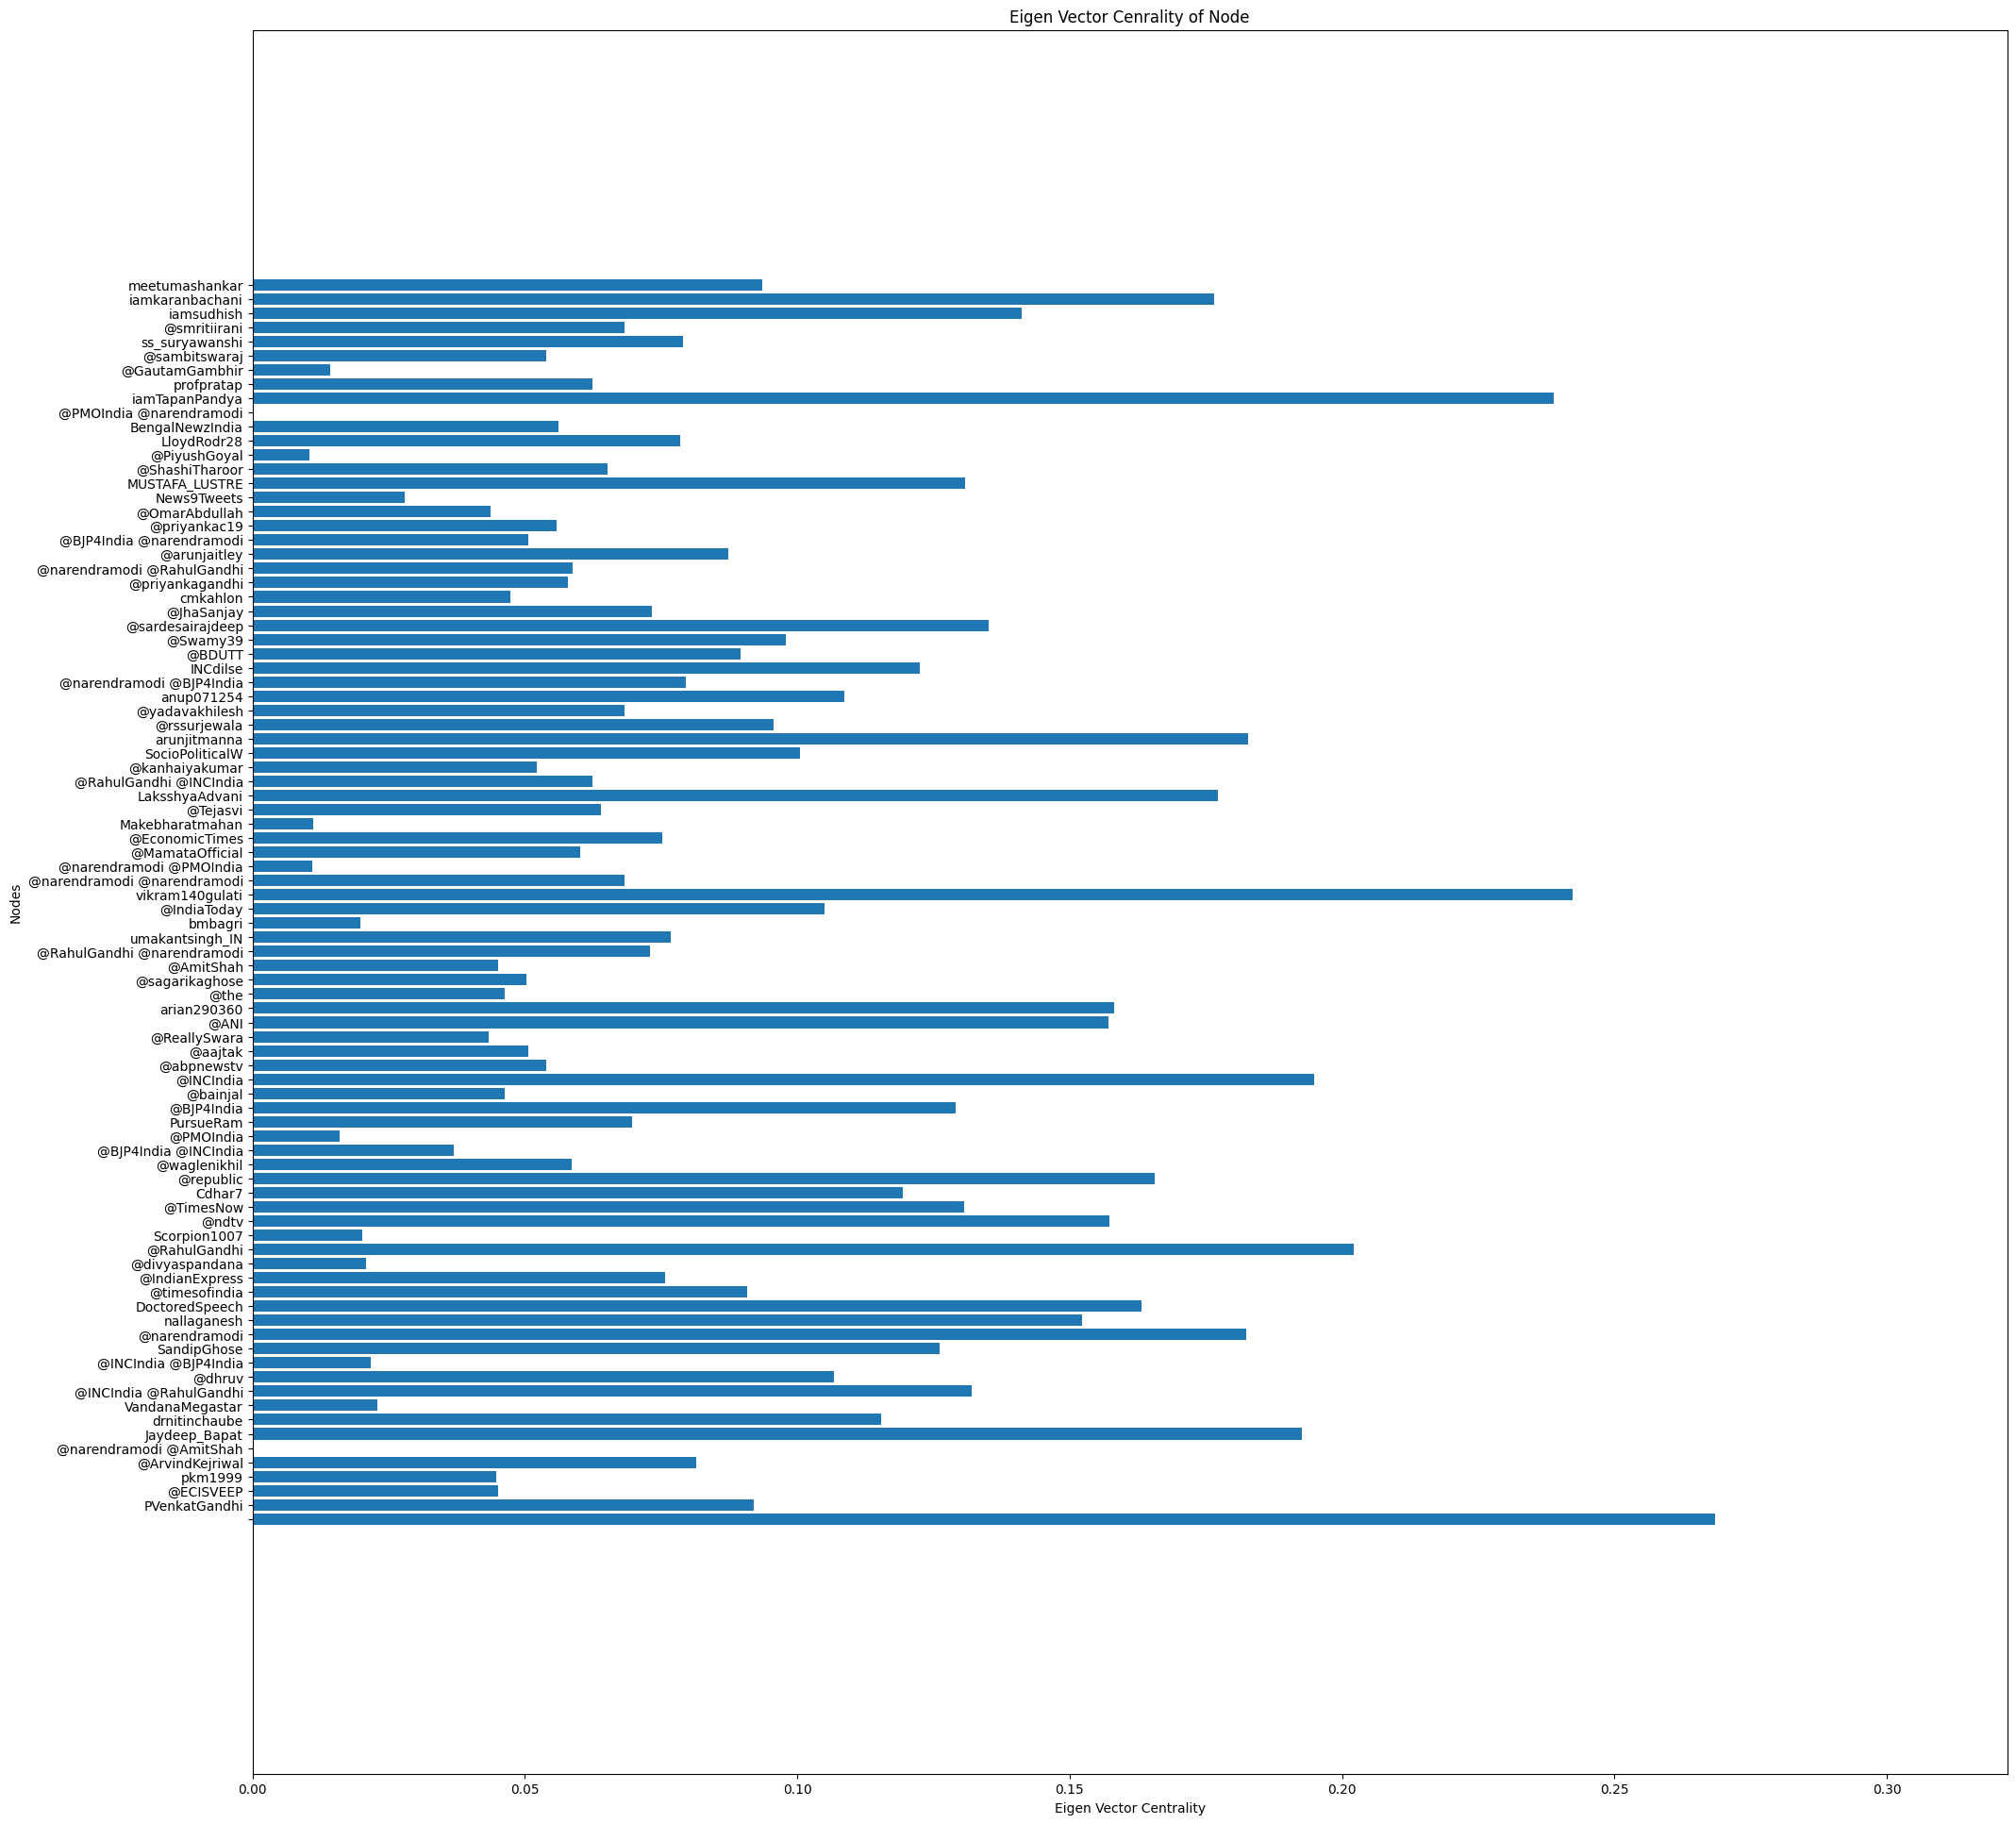

In [25]:
node_size = [v for k,v in nx.get_node_attributes(deg_gt150,'eg_centrality').items()]
labels = [k for k,v  in nx.get_node_attributes(deg_gt150,'eg_centrality').items()]
# print(node_size)
plt.figure(1, figsize=(24,24))
plt.margins(x=0.2, y=0.2)
plt.xlabel("Eigen Vector Centrality")
plt.ylabel("Nodes")
plt.title("Eigen Vector Cenrality of Node")
plt.barh(labels, node_size)
plt.show()

In [26]:
pr=nx.pagerank(core1)
pr

{'': 0.0698284506893186,
 '@ECISVEEP': 0.007537688442211057,
 'pkm1999': 0.03426213390422702,
 '@ArvindKejriwal': 0.007537688442211057,
 '@INCIndia @RahulGandhi': 0.030542158479036675,
 'SandipGhose': 0.08175425619538182,
 '@narendramodi': 0.03197164065888094,
 'nallaganesh': 0.09777321328946965,
 '@timesofindia': 0.019410474487539034,
 '@RahulGandhi': 0.03226224931158983,
 '@ndtv': 0.04368454195579636,
 '@TimesNow': 0.042414944524364645,
 '@republic': 0.05526671934841545,
 '@PMOIndia': 0.007537688442211057,
 '@BJP4India': 0.007537688442211057,
 '@INCIndia': 0.03181175591046839,
 '@ANI': 0.042414944524364645,
 '@AmitShah': 0.020389463266261856,
 'LaksshyaAdvani': 0.15119353402875454,
 '@RahulGandhi @INCIndia': 0.007537688442211057,
 '@narendramodi @BJP4India': 0.020389463266261856,
 'INCdilse': 0.09406326763317546,
 '@JhaSanjay': 0.03495119460716501,
 '@arunjaitley': 0.020389463266261856,
 '@GautamGambhir': 0.007537688442211057}

In [27]:
prs=dict(sorted(pr.items(), key=lambda item: item[1]))
#top-10
for x in list(prs)[-10:]:
  print ("{}, {}".format(x,pr[x]))

@JhaSanjay, 0.03495119460716501
@TimesNow, 0.042414944524364645
@ANI, 0.042414944524364645
@ndtv, 0.04368454195579636
@republic, 0.05526671934841545
, 0.0698284506893186
SandipGhose, 0.08175425619538182
INCdilse, 0.09406326763317546
nallaganesh, 0.09777321328946965
LaksshyaAdvani, 0.15119353402875454
